In [29]:
import pandas as pd

# Load the dataset
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Display first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [30]:
# Example: Encoding 'sex' column
data['sex'] = data['sex'].map({1: 'male', 0: 'female'})
data = pd.get_dummies(data, columns=['sex'], drop_first=True)


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
            'ejection_fraction', 'high_blood_pressure', 'platelets',
            'serum_creatinine', 'serum_sodium', 'sex_male',
            'smoking']

data[features] = scaler.fit_transform(data[features])


In [32]:
from sklearn.model_selection import train_test_split

X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

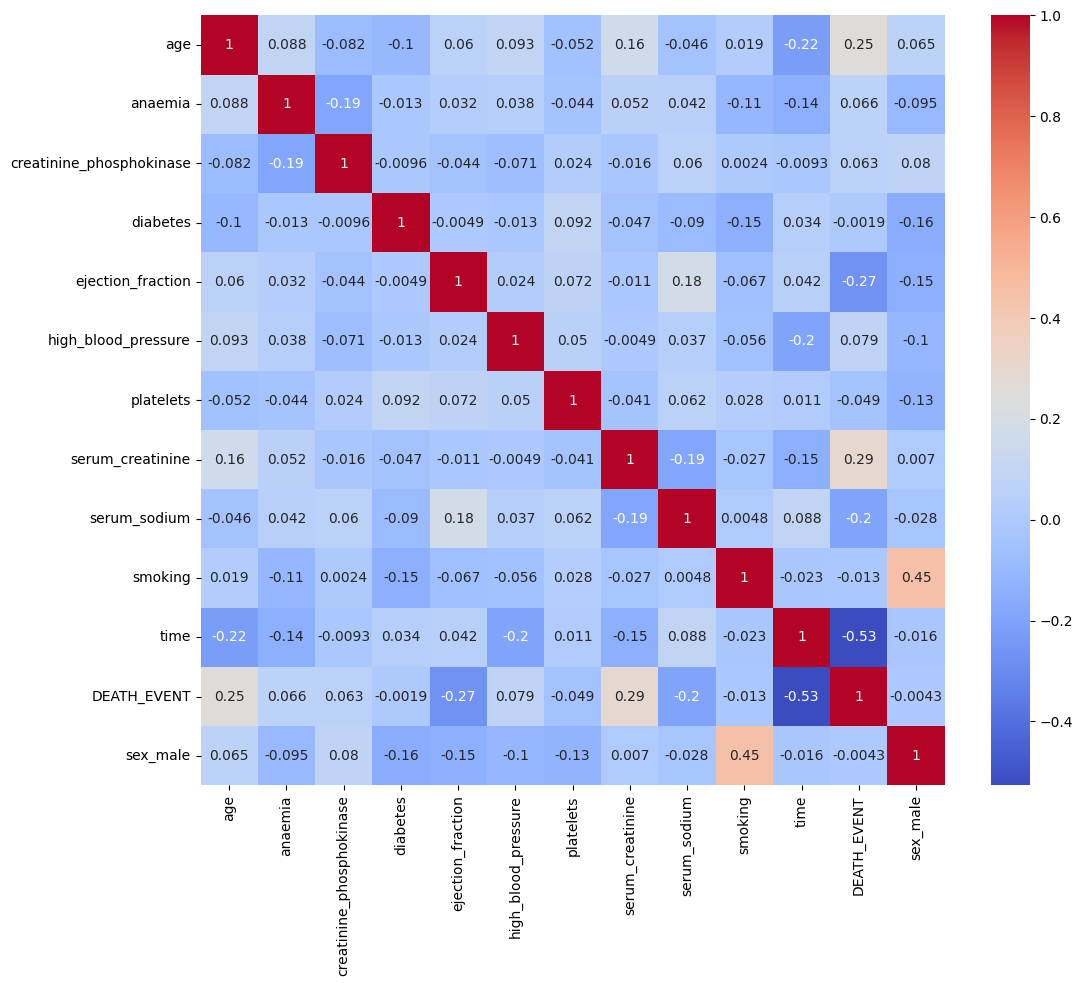

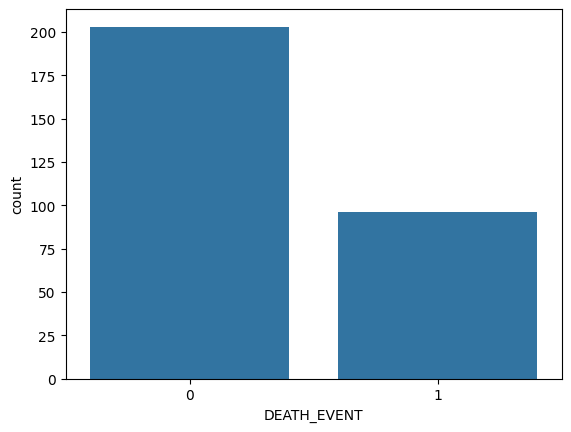

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Distribution of target variable
sns.countplot(x='DEATH_EVENT', data=data)
plt.show()

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[29  6]
 [12 13]]
              precision    recall  f1-score   support

           0       0.71      0.83      0.76        35
           1       0.68      0.52      0.59        25

    accuracy                           0.70        60
   macro avg       0.70      0.67      0.68        60
weighted avg       0.70      0.70      0.69        60

Accuracy: 0.7


In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [38]:
import joblib

# Save the model
joblib.dump(grid_search.best_estimator_, 'heart_failure_model.pkl')

# Save the scaler if used
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']